In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [98]:
def create_rectangle(x, y, width, height):
    rect=patches.Rectangle((x, y), width, height ,edgecolor='red',facecolor='none')
    return rect


In [ ]:
def create_circle(x, y, radius):
    circle=patches.Circle((x, y), radius ,edgecolor='r',facecolor='none')
    return circle

In [92]:
def create_semi_circle(x,y, radius,circle_begin, circle_end):
    crease=patches.Arc((x,y), radius, radius, angle=0, theta1=circle_begin, theta2=circle_end, color='red')
    return crease

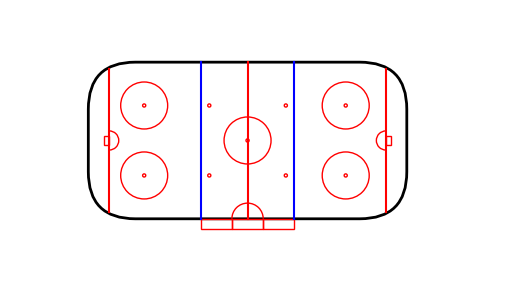

In [ ]:
fig, ax = plt.subplots()

rink = patches.FancyBboxPatch(
    (0, 0), 61, 30,
    boxstyle=patches.BoxStyle("Round", pad=0, rounding_size=9),
    edgecolor='black', facecolor='white', lw=2)


ax.add_patch(rink)
#creating all face off circles
ax.add_patch(create_circle(10.7,21.7,4.5)) #face off circle of the left side
ax.add_patch(create_circle(10.7,8.3,4.5))  #//
ax.add_patch(create_circle(49.3,21.7,4.5)) #face off circle on the right side
ax.add_patch(create_circle(49.3,8.3,4.5))  #//
ax.add_patch(create_circle(rink)width.5,15,4.5))   #faceoff circle in the middle

#creating all face off dots
ax.add_patch(create_circle(10.7,21.7,0.3)) #face off circle of the left side
ax.add_patch(create_circle(10.7,8.3,0.3))  #//
ax.add_patch(create_circle(49.3,21.7,0.3)) #face off circle on the right side
ax.add_patch(create_circle(49.3,8.3,0.3))  #//
ax.add_patch(create_circle(23.17,21.7,0.3)) #face off circle in the neutral zone on the left side
ax.add_patch(create_circle(23.17,8.3,0.3))  #//
ax.add_patch(create_circle(37.83,21.7,0.3)) #face off circle in the neutral zone on the right side
ax.add_patch(create_circle(37.83,8.3,0.3))  #//
ax.add_patch(create_circle(rink)width.5,15,0.3))   #faceoff circle in the middle

# Creating the blue lines
ax.plot([21.67, 21.67], [0, 30], color='blue')
ax.plot([39.33, 39.33], [0, 30], color='blue')

# Creating the red lines
ax.plot([30.5, 30.5], [0, 30], color='red')
ax.plot([4, 4], [1.3, 28.7], color='red')
ax.plot([57, 57],[1.3, 28.7], color='red')

# Creating goal semi_circles
ax.add_patch(create_semi_circle(4,15,3.66,-90,90)) #left goal crease
ax.add_patch(create_semi_circle(57,15,3.66,90,-90)) #right goal crease 
ax.add_patch(create_semi_circle(30.5,0,6,0,180)) # referee's circle

# Create the goal rectangles
ax.add_patch(create_rectangle(3, 14.085, 1, 1.83)) #left goal
ax.add_patch(create_rectangle(57, 14.085, 1, 1.83)) #right goal

# penalty boxes and scorekeepers boxes
ax.add_patch(create_rectangle(21.67, -2, 5.8866, 2)) #left penalty box
ax.add_patch(create_rectangle(27.5566, -2, 5.8866, 2)) #left penalty box
ax.add_patch(create_rectangle(33.4432, -2, 5.8866, 2)) #left penalty box

ax.set_xlim(-15, 80)
ax.set_ylim(-10, 40)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [120]:
fig.set_size_inches(20,10) # 10 inches wide, 6 inches high

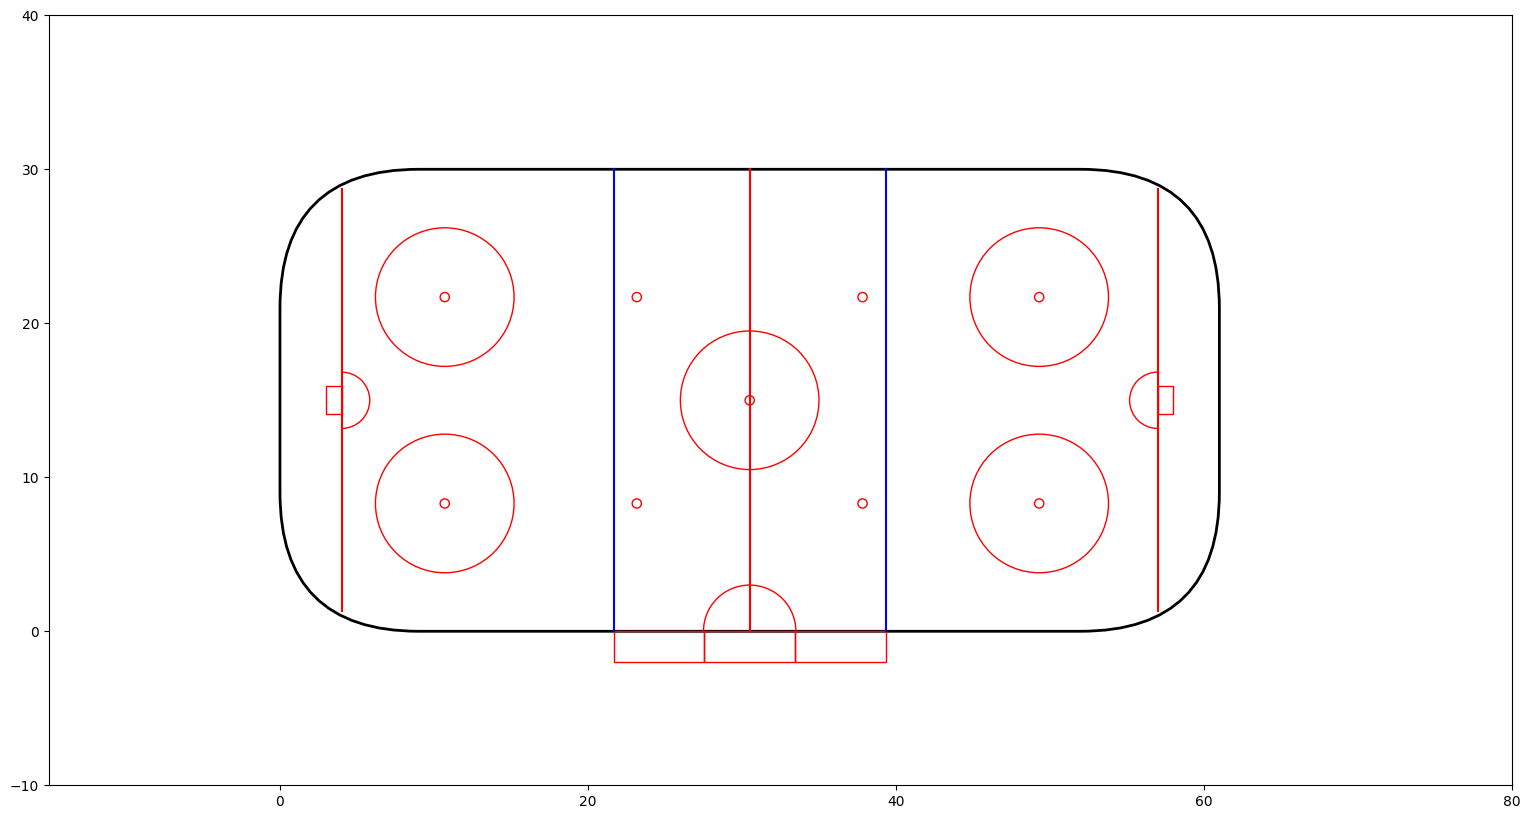

In [121]:
fig

In [164]:
dim={
    "rink_length":200,
    "rink_width":85,
    "corner_radius":28,
    "goal_line":11,
    "goal_width":6,
    "goal_depth":3.333,
    "goal_crease_diameter":8,
    "faceoff_circle_yloc":20.5,
    "faceoff_circle_xloc":33,
    "faceoff_circle_radius":15,
    "faceoff_spot_neutral_xloc":80,
    "faceoff_spot_radius":0.5,
    "blue_line":75,
    

}

In [178]:
def create_rink(scale):
    rink_length=dim["rink_length"]/scale
    rink_width=dim["rink_width"]/scale
    corner_radius=dim["corner_radius"]/scale
    goal_line=dim["goal_line"]/scale
    goal_width=dim["goal_width"]/scale
    goal_depth=dim["goal_depth"]/scale
    goal_crease_diameter=dim["goal_crease_diameter"]/scale
    faceoff_circle_yloc=dim["faceoff_circle_yloc"]/scale
    faceoff_circle_xloc=dim["faceoff_circle_xloc"]/scale
    faceoff_circle_radius=dim["faceoff_circle_radius"]/scale
    faceoff_spot_radius=dim["faceoff_spot_radius"]/scale
    faceoff_spot_neutral_xloc=dim["faceoff_spot_neutral_xloc"]/scale
    faceoff_spot__neutral_radius=dim["faceoff_spot_radius"]/scale
    blue_line=dim["blue_line"]/scale


    fig, ax = plt.subplots()

    rink = patches.FancyBboxPatch(
        (0, 0), rink_length, rink_width,
        boxstyle=patches.BoxStyle("Round", pad=0, rounding_size=corner_radius),
        edgecolor='black', facecolor='white', lw=2)


    ax.add_patch(rink)

    # Creating the red lines
    ax.plot([rink_length/2, rink_length/2], [0, rink_width], color='red')
    ax.plot([goal_line, goal_line], [1.3, rink_width], color='red')
    ax.plot([rink_length-goal_line, rink_length-goal_line],[1.3, rink_width], color='red')

    # Creating the blue lines
    ax.plot([blue_line, blue_line], [0, rink_width], color='blue')
    ax.plot([rink_length-blue_line, rink_length-blue_line], [0, rink_width], color='blue')

    #creating all face off circles
    ax.add_patch(create_circle(faceoff_circle_xloc,rink_width-faceoff_circle_yloc,faceoff_circle_radius)) #face off circle of the left side
    ax.add_patch(create_circle(faceoff_circle_xloc,faceoff_circle_yloc,faceoff_circle_radius))  #//
    ax.add_patch(create_circle(rink_length-faceoff_circle_xloc,rink_width-faceoff_circle_yloc,faceoff_circle_radius)) #face off circle on the right side
    ax.add_patch(create_circle(rink_length-faceoff_circle_xloc,faceoff_circle_yloc,faceoff_circle_radius))  #//
    ax.add_patch(create_circle(rink_width/2,rink_length/2,faceoff_circle_radius))   #faceoff circle in the middle

    #creating all face off dots
    ax.add_patch(create_circle(faceoff_circle_xloc,rink_width-faceoff_circle_yloc,faceoff_spot_radius)) #face off circle of the left side
    ax.add_patch(create_circle(faceoff_circle_xloc,faceoff_circle_yloc,faceoff_spot_radius))  #//
    ax.add_patch(create_circle(rink_length-faceoff_circle_xloc,rink_width-faceoff_circle_yloc,faceoff_spot_radius)) #face off circle on the right side
    ax.add_patch(create_circle(rink_length-faceoff_circle_xloc,faceoff_circle_yloc,faceoff_spot_radius))  #//
    ax.add_patch(create_circle(faceoff_spot_neutral_xloc,rink_width-faceoff_circle_yloc,faceoff_spot_radius)) #face off circle in the neutral zone on the left side
    ax.add_patch(create_circle(faceoff_spot_neutral_xloc,faceoff_circle_yloc,faceoff_spot_radius))  #//
    ax.add_patch(create_circle(rink_length-faceoff_spot_neutral_xloc,rink_width-faceoff_circle_yloc,faceoff_spot_radius)) #face off circle in the neutral zone on the right side
    ax.add_patch(create_circle(rink_length-faceoff_spot_neutral_xloc,faceoff_circle_yloc,faceoff_spot_radius))  #//
    ax.add_patch(create_circle(rink_length/2,rink_width/2,faceoff_spot__neutral_radius))   #faceoff circle in the middle



    # Creating goal semi_circles
    ax.add_patch(create_semi_circle(goal_line,rink_width/2,goal_crease_diameter,-90,90)) #left goal crease
    ax.add_patch(create_semi_circle(rink_length-goal_line,rink_width/2,goal_crease_diameter,90,-90)) #right goal crease 
    ax.add_patch(create_semi_circle(rink_length/2,0,10,0,180)) # referee's circle

    # Create the goal rectangles
    ax.add_patch(create_rectangle(goal_line-goal_depth, (rink_width-goal_width)/2, goal_depth, goal_width)) #left goal
    ax.add_patch(create_rectangle(rink_length-goal_line, (rink_width-goal_width)/2, goal_depth, goal_width)) #right goal

    # penalty boxes and scorekeepers boxes
    #ax.add_patch(create_rectangle(21.67, -2, 5.8866, 2)) #left penalty box
    #ax.add_patch(create_rectangle(27.5566, -2, 5.8866, 2)) #left penalty box
    #ax.add_patch(create_rectangle(33.4432, -2, 5.8866, 2)) #left penalty box

    ax.set_xlim(0, rink_length)
    ax.set_ylim(0, rink_width)
    ax.set_aspect('equal')
    ax.axis('off')
    fig.set_size_inches(20,10) # 10 inches wide, 6 inches high
    plt.show()


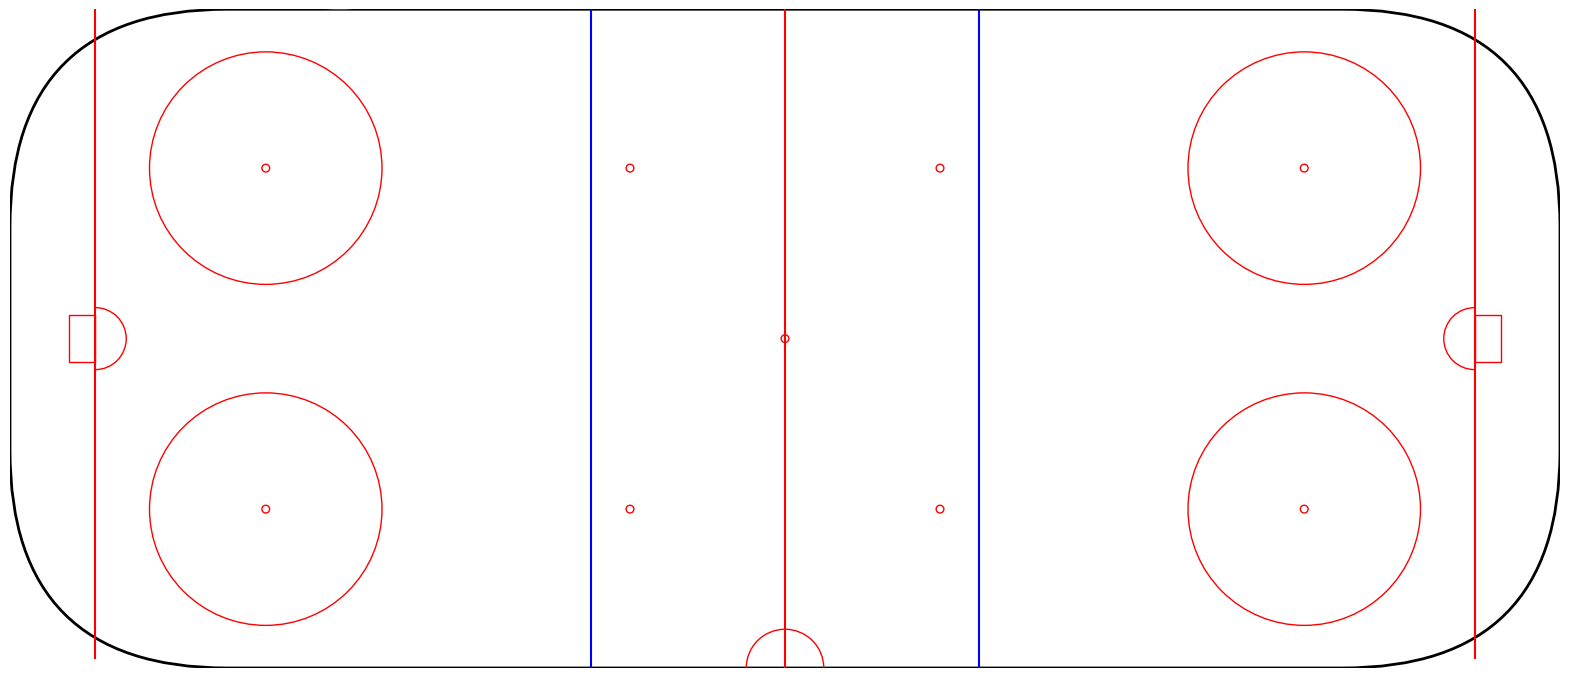

In [179]:
create_rink(1)